In [1]:
from Clases.Codigo import *

In [2]:
bp=blackPhospho()
#print(bp)

In [3]:
maximo=10
u,v=bp.u,bp.v
magicAngles = []
for k in range(1,(2*maximo)+1):
        for i in range(1,k):
            j = k-i
            if (i<(maximo+1) and j<(maximo+1)):
                v1=m2V(u,v,(i,-j))
                v2=m2V(u,v,(i,j))
                v3=m2V(u,v,(-i,j))
                magicAngles.append([cAng(v1,v2),(i,j),(i,-j)])
                print("Ang:{:.4f}º v1=({},{}) v2=({},{})".format(cAng(v1,v2),i,j,i,-j))
                magicAngles.append([cAng(v3,v2),(i,j),(-i,j)])
                print("Ang:{:.4f}º v1=({},{}) v2=({},{})".format(cAng(v3,v2),i,j,-i,j))


Ang:108.0233º v1=(1,1) v2=(1,-1)
Ang:71.9767º v1=(1,1) v2=(-1,1)
Ang:140.0865º v1=(1,2) v2=(1,-2)
Ang:39.9135º v1=(1,2) v2=(-1,2)
Ang:69.0937º v1=(2,1) v2=(2,-1)
Ang:110.9063º v1=(2,1) v2=(-2,1)
Ang:152.7836º v1=(1,3) v2=(1,-3)
Ang:27.2164º v1=(1,3) v2=(-1,3)
Ang:108.0233º v1=(2,2) v2=(2,-2)
Ang:71.9767º v1=(2,2) v2=(-2,2)
Ang:49.3093º v1=(3,1) v2=(3,-1)
Ang:130.6907º v1=(3,1) v2=(-3,1)
Ang:159.4192º v1=(1,4) v2=(1,-4)
Ang:20.5808º v1=(1,4) v2=(-1,4)
Ang:128.3317º v1=(2,3) v2=(2,-3)
Ang:51.6683º v1=(2,3) v2=(-2,3)
Ang:85.1027º v1=(3,2) v2=(3,-2)
Ang:94.8973º v1=(3,2) v2=(-3,2)
Ang:37.9913º v1=(4,1) v2=(4,-1)
Ang:142.0087º v1=(4,1) v2=(-4,1)
Ang:163.4716º v1=(1,5) v2=(1,-5)
Ang:16.5284º v1=(1,5) v2=(-1,5)
Ang:140.0865º v1=(2,4) v2=(2,-4)
Ang:39.9135º v1=(2,4) v2=(-2,4)
Ang:108.0233º v1=(3,3) v2=(3,-3)
Ang:71.9767º v1=(3,3) v2=(-3,3)
Ang:69.0937º v1=(4,2) v2=(4,-2)
Ang:110.9063º v1=(4,2) v2=(-4,2)
Ang:30.7945º v1=(5,1) v2=(5,-1)
Ang:149.2055º v1=(5,1) v2=(-5,1)
Ang:166.1971º v1=(1,6) v2=

In [4]:
def buscaSV(vectU,vectV, th, rango=15, limDelta=0.1, show=True):
    lim = limDelta
    f1, f2 = 0, 0
    res = [[],[]]
    rmin = [0,0,0,0,0.0]
    rmin2 = [0,0,0,0,0.0]
    ang = math.radians(th)
    cos = math.cos(ang)
    sen = math.sin(ang)
    ru, rv = rota(vectU,th), rota(vectV,th)
    (u1,u2) = vectU
    (v1,v2) = vectV
    ax1 = (u2*v1)-(u1*v2)
    ax2 = (u1*v1)+(u2*v2)
    ax3 = (v1**2)+(v2**2)
    ax4 = (u1**2)+(u2**2)
    delta=0.0
    for k in range(1,(2*rango)+1):
        for i in range(1,k):
            j = k-i
            if(i<(rango+1) and j<(rango+1)):
                # Buscando en a+
                a,b = i,-j
                c = (a*(ax1*cos-ax2*sen)/ax1)-(b*(ax3*sen)/ax1)
                d = (b*(ax1*cos+ax2*sen)/ax1)+(a*(ax4*sen)/ax1)
                r1 = sumaV(multV(a,vectU),multV(b,vectV))
                r2 = sumaV(multV(round(c),ru),multV(round(d),rv))
                delta = dist((0,0),r1)/dist((0,0),r2)
                err = dist(r1,r2)*(abs(delta))
                if (err<limDelta):
                    if(abs(1-delta)<0.03):
                        res[0].append([[a,b],[round(c),round(d)],delta])
                        print(">({},{})-({},{}): Delta={}%".format(a,b,round(c),round(d),delta*100),":",dist(r1,r2))
                # Buscando en a-
                if j!=0:
                    a,b = i,j
                    c = (a*(ax1*cos-ax2*sen)/ax1)-(b*(ax3*sen)/ax1)
                    d = (b*(ax1*cos+ax2*sen)/ax1)+(a*(ax4*sen)/ax1)
                    r1 = sumaV(multV(a,vectU),multV(b,vectV))
                    r2 = sumaV(multV(round(c),ru),multV(round(d),rv))
                    delta = dist((0,0),r1)/dist((0,0),r2)
                    err = dist(r1,r2)*(abs(delta))
                    if (err<limDelta):
                        if(abs(1-delta)<0.03):
                            res[1].append([[a,b],[round(c),round(d)],delta])
                            print(">>({},{})-({},{}): Delta={}%".format(a,b,round(c),round(d),delta*100),":",dist(r1,r2))
    return res
def dameP(r,theta):
    tmin=200
    angR=0.0
    resultado=""
    P=(1,0,0,1)
    for i in range(len(r[0])):
        for j in range(len(r[1])):
            [m,p] = r[0][i][0]
            [n,q] = r[1][j][0]
            tam = (m*q)-(n*p)
            ang = cAng(m2V(u,v,(m,p)),m2V(u,v,(n,q)))
            print((m,p),(n,q),"det=",tam,"Ang={}°".format(ang))
            if tam==tmin:
                if abs(ang-90)<abs(angR-90):
                    resultado="\nMejor P para Theta={}:\n|{}\t{}|\n|{}\t{}|\nDet={}".format(theta,m,n,p,q,tam)
                    P = (m,n,p,q)
                    angR=ang
            if tam<tmin:
                resultado="\nMejor P para Theta={}:\n|{}\t{}|\n|{}\t{}|\nDet={}".format(theta,m,n,p,q,tam)
                P = (m,n,p,q)
                tmin=tam
    print(resultado)
    return P

In [5]:
rl=buscaSV(u,v,magicAngles[0][0]/2,limDelta=0.3)

>>(2,7)-(9,3): Delta=99.40781396848334% : 0.29426941924103134
>(2,-10)-(-10,-7): Delta=100.18089270333131% : 0.2593051148520269
>(9,-3)-(2,-7): Delta=100.5957137652221% : 0.29426941924103056
>>(7,7)-(12,0): Delta=99.27040758027277% : 0.2894535270742846
>(7,-10)-(-7,-10): Delta=100.00000000000003% : 0.10477047607648664
>(10,-7)-(-2,-10): Delta=99.81943392751853% : 0.25930511485202656
>>(10,10)-(17,0): Delta=100.10461268598935% : 0.05879637635102423


In [6]:
dameP(rl,magicAngles[2][0])

(2, -10) (2, 7) det= 34 Ang=160.01355900619976°
(2, -10) (7, 7) det= 84 Ang=135.7474532422141°
(2, -10) (10, 10) det= 120 Ang=135.74745324221414°
(9, -3) (2, 7) det= 69 Ang=102.9324371732175°
(9, -3) (7, 7) det= 84 Ang=78.66633140923184°
(9, -3) (10, 10) det= 120 Ang=78.66633140923184°
(7, -10) (2, 7) det= 69 Ang=141.33070946725843°
(7, -10) (7, 7) det= 119 Ang=117.06460370327278°
(7, -10) (10, 10) det= 170 Ang=117.06460370327278°
(10, -7) (2, 7) det= 84 Ang=122.22408949846229°
(10, -7) (7, 7) det= 119 Ang=97.95798373447664°
(10, -7) (10, 10) det= 170 Ang=97.95798373447664°

Mejor P para Theta=140.0864820736585:
|2	2|
|-10	7|
Det=34


(2, 2, -10, 7)

In [7]:
rl

[[[[2, -10], [-10, -7], 1.001808927033313],
  [[9, -3], [2, -7], 1.005957137652221],
  [[7, -10], [-7, -10], 1.0000000000000002],
  [[10, -7], [-2, -10], 0.9981943392751853]],
 [[[2, 7], [9, 3], 0.9940781396848334],
  [[7, 7], [12, 0], 0.9927040758027278],
  [[10, 10], [17, 0], 1.0010461268598936]]]

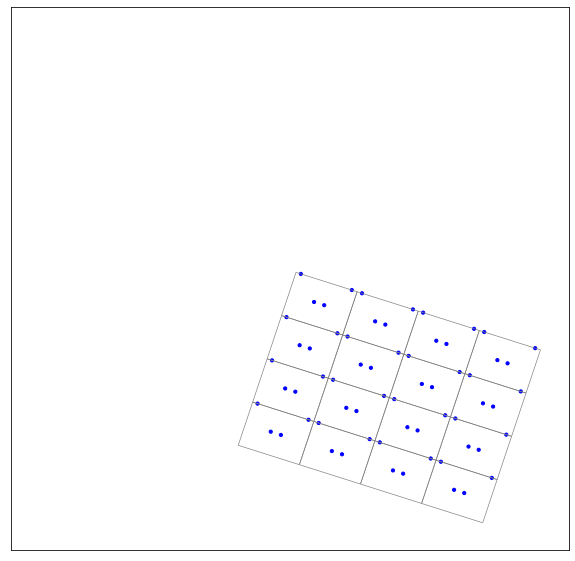

1

In [8]:
bpr=blackPhospho()
bpr=bpr.mRot(-magicAngles[0][0])
for a in bpr.atms[0]:
    a.color='blue'
bpr.showNM(4,4)

In [9]:
ru,rv=bpr.u,bpr.v
u,v=bp.u,bp.v

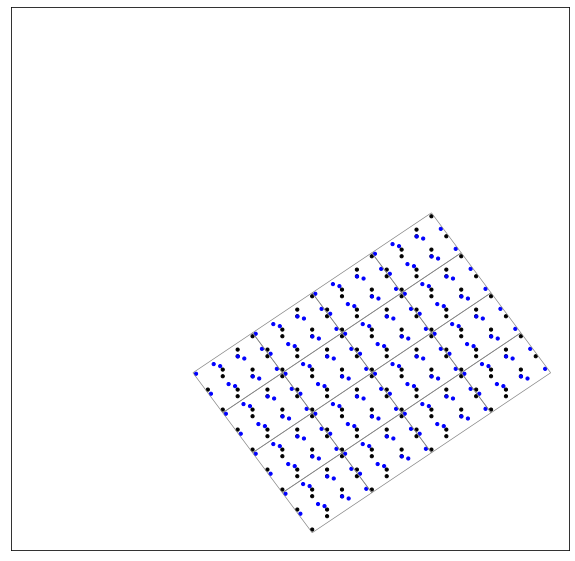

1

In [10]:
su,sv=transfVs(u,v,(1,2,-1,1))
sCell=superMesh(su,sv,[bp,bpr])
sCell.showNM(4,4)
sCell.exporta(name='phospho(1,-1 sin modificar)')

In [11]:
print("Vectores en Capa 1:\n\t",m2V(u,v,(1,-1)),",",m2V(u,v,(2,1)))
print("Vectores en Capa 2:\n\t",m2V(ru,rv,(1,1)),",",m2V(ru,rv,(-2,1)))
print("Diferencia en resultados:\n\t",dist(m2V(u,v,(1,-1)),m2V(ru,rv,(1,1))),",",dist(m2V(u,v,(2,1)),m2V(ru,rv,(-2,1))))
#dist(m2V(u,v,(1,-1)),m2V(ru,rv,(1,1)))

Vectores en Capa 1:
	 (3.3061099052, -4.552418232) , (6.6122198104, 4.552418232)
Vectores en Capa 2:
	 (3.3061099052, -4.552418232) , (6.374882132008162, 4.8792253876097265)
Diferencia en resultados:
	 0.0 , 0.403896138310516


In [12]:
#Calculamos el alfa
(x,y) = m2V(u,v,(1,-1))
alfa = (((4.552418232/3.3061099052)+(6.6122198104/4.552418232))/2)
print("x = {:.4f}\ny = {:.4f}".format(x,y))
print("alfa = {:.4f}".format(alfa))

x = 3.3061
y = -4.5524
alfa = 1.4147


In [13]:
alfaX, alfaY = ((-alfa*y)), ((alfa*x))
print("x' = {:.4f}\ny' = {:.4f}".format(alfaX, alfaY))
cAng((x,y), (alfaX, alfaY))

x' = 6.4404
y' = 4.6772


90.0

In [19]:
#Redimencionamos los vectores generadores de ambas capas con los que obtuvimos. 
bp.u, bp.v = transfVs((x,y), (alfaX, alfaY),(1/3,-2/3,1/3,1/3))
bpr.u, bpr.v = transfVs((x,y), (alfaX, alfaY),(1/3,2/3,-1/3,1/3))
#Actualizando valores
ru,rv=bpr.u,bpr.v
u,v=bp.u,bp.v
(a1,a2),(b1,b2) = bp.u, bp.v
print("a  = ({:.4f} , {:.4f})\nb  = ({:.4f},{:.4f})".format(a1,a2,b1,b2))
(a1,a2),(b1,b2) = bpr.u, bpr.v
print("a' = ({:.4f} , {:.4f})\nb' = ({:.4f},{:.4f})".format(a1,a2,b1,b2))

a  = (3.2488 , 0.0416)
b  = (-0.0573,4.5940)
a' = (-1.0448 , -3.0765)
b' = (4.3509,-1.4759)


### Modificamos los vectores generadores de ambas capas para que coincidan.
Dado que con los vectores generadores tal y como los tenemos no coinciden los resultados, los modificamos de tal manera que si lo hagan, por lo que buscamos los vectores $a,b,a',b'$ tales que cumplan:

$$
\left(
    \begin{array}{cc}
        1 & -1 \\
        2 & 1
    \end{array}
\right)
\cdot
\left(
    \begin{array}{cc}
        a \\
        b
    \end{array}
\right)
=
\left(
    \begin{array}{cc}
        1 & 1 \\
        -2 & 1
    \end{array}
\right)
\cdot
\left(
    \begin{array}{cc}
        a' \\
        b'
    \end{array}
\right)
=
\left(
    \begin{array}{cc}
        x & y\\
        -\alpha y & \alpha x
    \end{array}
\right)
$$

Donde x=3.3061, y=-4.5524 y $\alpha$=1.4147, (valores que aproximan a los resultados que queremos), así tenemos que:

$$
\left(
    \begin{array}{cc}
        a \\
        b
    \end{array}
\right)
=
\left(
    \begin{array}{cc}
        1 & -1 \\
        2 & 1
    \end{array}
\right)^{-1}
\cdot
\left(
    \begin{array}{cc}
        3.3061 & -4.5524\\
        6.4404 & 4.6772
    \end{array}
\right)
$$

$$
\left(
    \begin{array}{cc}
        a' \\
        b'
    \end{array}
\right)
=
\left(
    \begin{array}{cc}
        1 & 1 \\
        -2 & 1
    \end{array}
\right)^{-1}
\cdot
\left(
    \begin{array}{cc}
        3.3061 & -4.5524\\
        6.4404 & 4.6772
    \end{array}
\right)
$$
Por lo tanto:

$$
\left(
    \begin{array}{cc}
        a \\
        b
    \end{array}
\right)
=
\left(
    \begin{array}{cc}
        3.2488 & 0.0416\\
        -0.0573 & 4.5940
    \end{array}
\right)
\,\, y \,\,
\left(
    \begin{array}{cc}
        a' \\
        b'
    \end{array}
\right)
=
\left(
    \begin{array}{cc}
        -1.0448 & -3.0765\\
        4.3509 & -1.4759
    \end{array}
\right)
$$

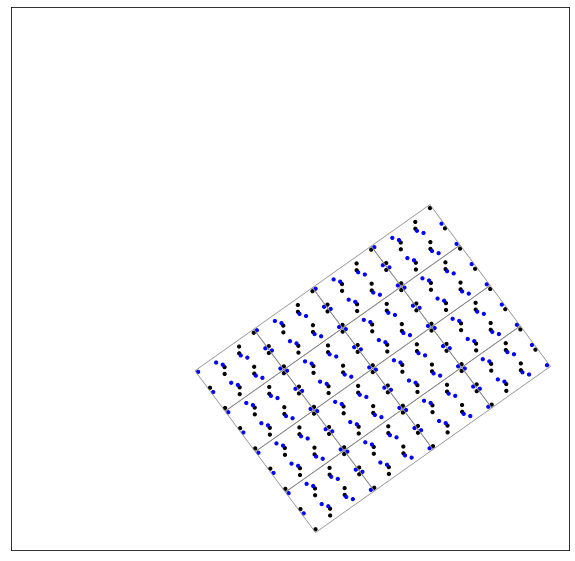

1

In [15]:
su,sv=transfVs(u,v,(1,2,-1,1))
sCell=superMesh(su,sv,[bp,bpr])
sCell.showNM(4,4)
sCell.exporta(name='phospho(1,-1 modificado)')

In [16]:
superMesh(u,v,[bp]).exporta(name='Phospho Modificado capa1')
superMesh(ru,rv,[bpr]).exporta(name='Phospho Modificado capa2')

1

In [18]:
alfaX, alfaY, x, y

(6.440384377813501, 4.677210550452904, 3.3061099052, -4.552418232)